First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    i

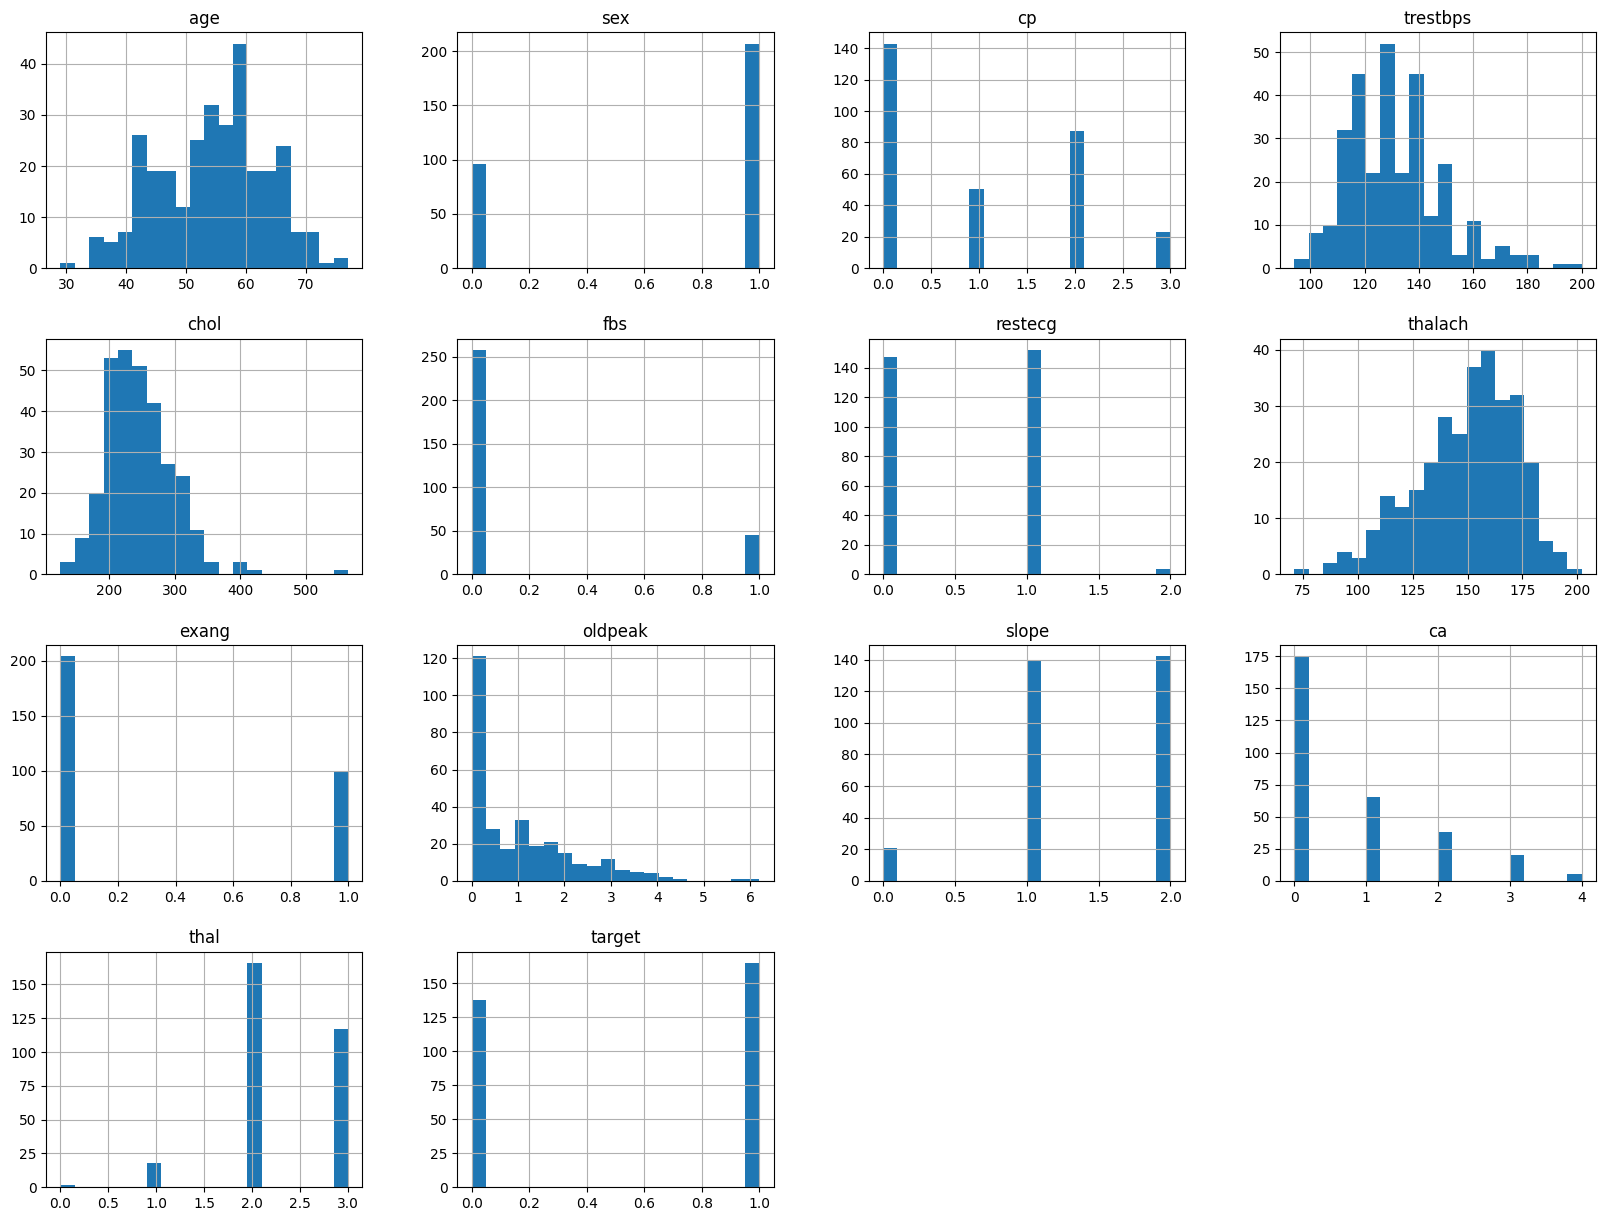

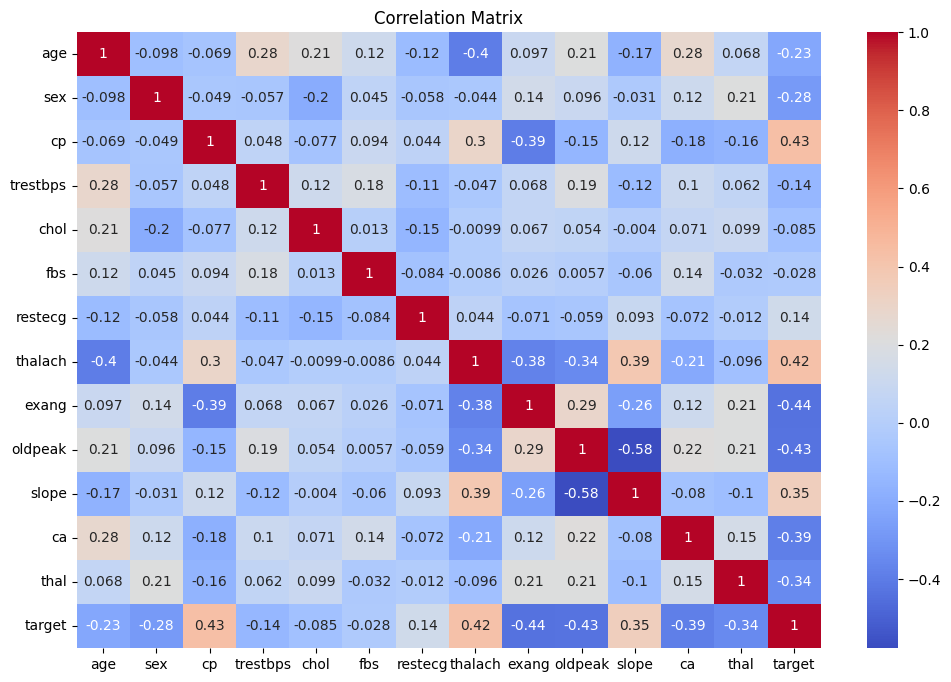

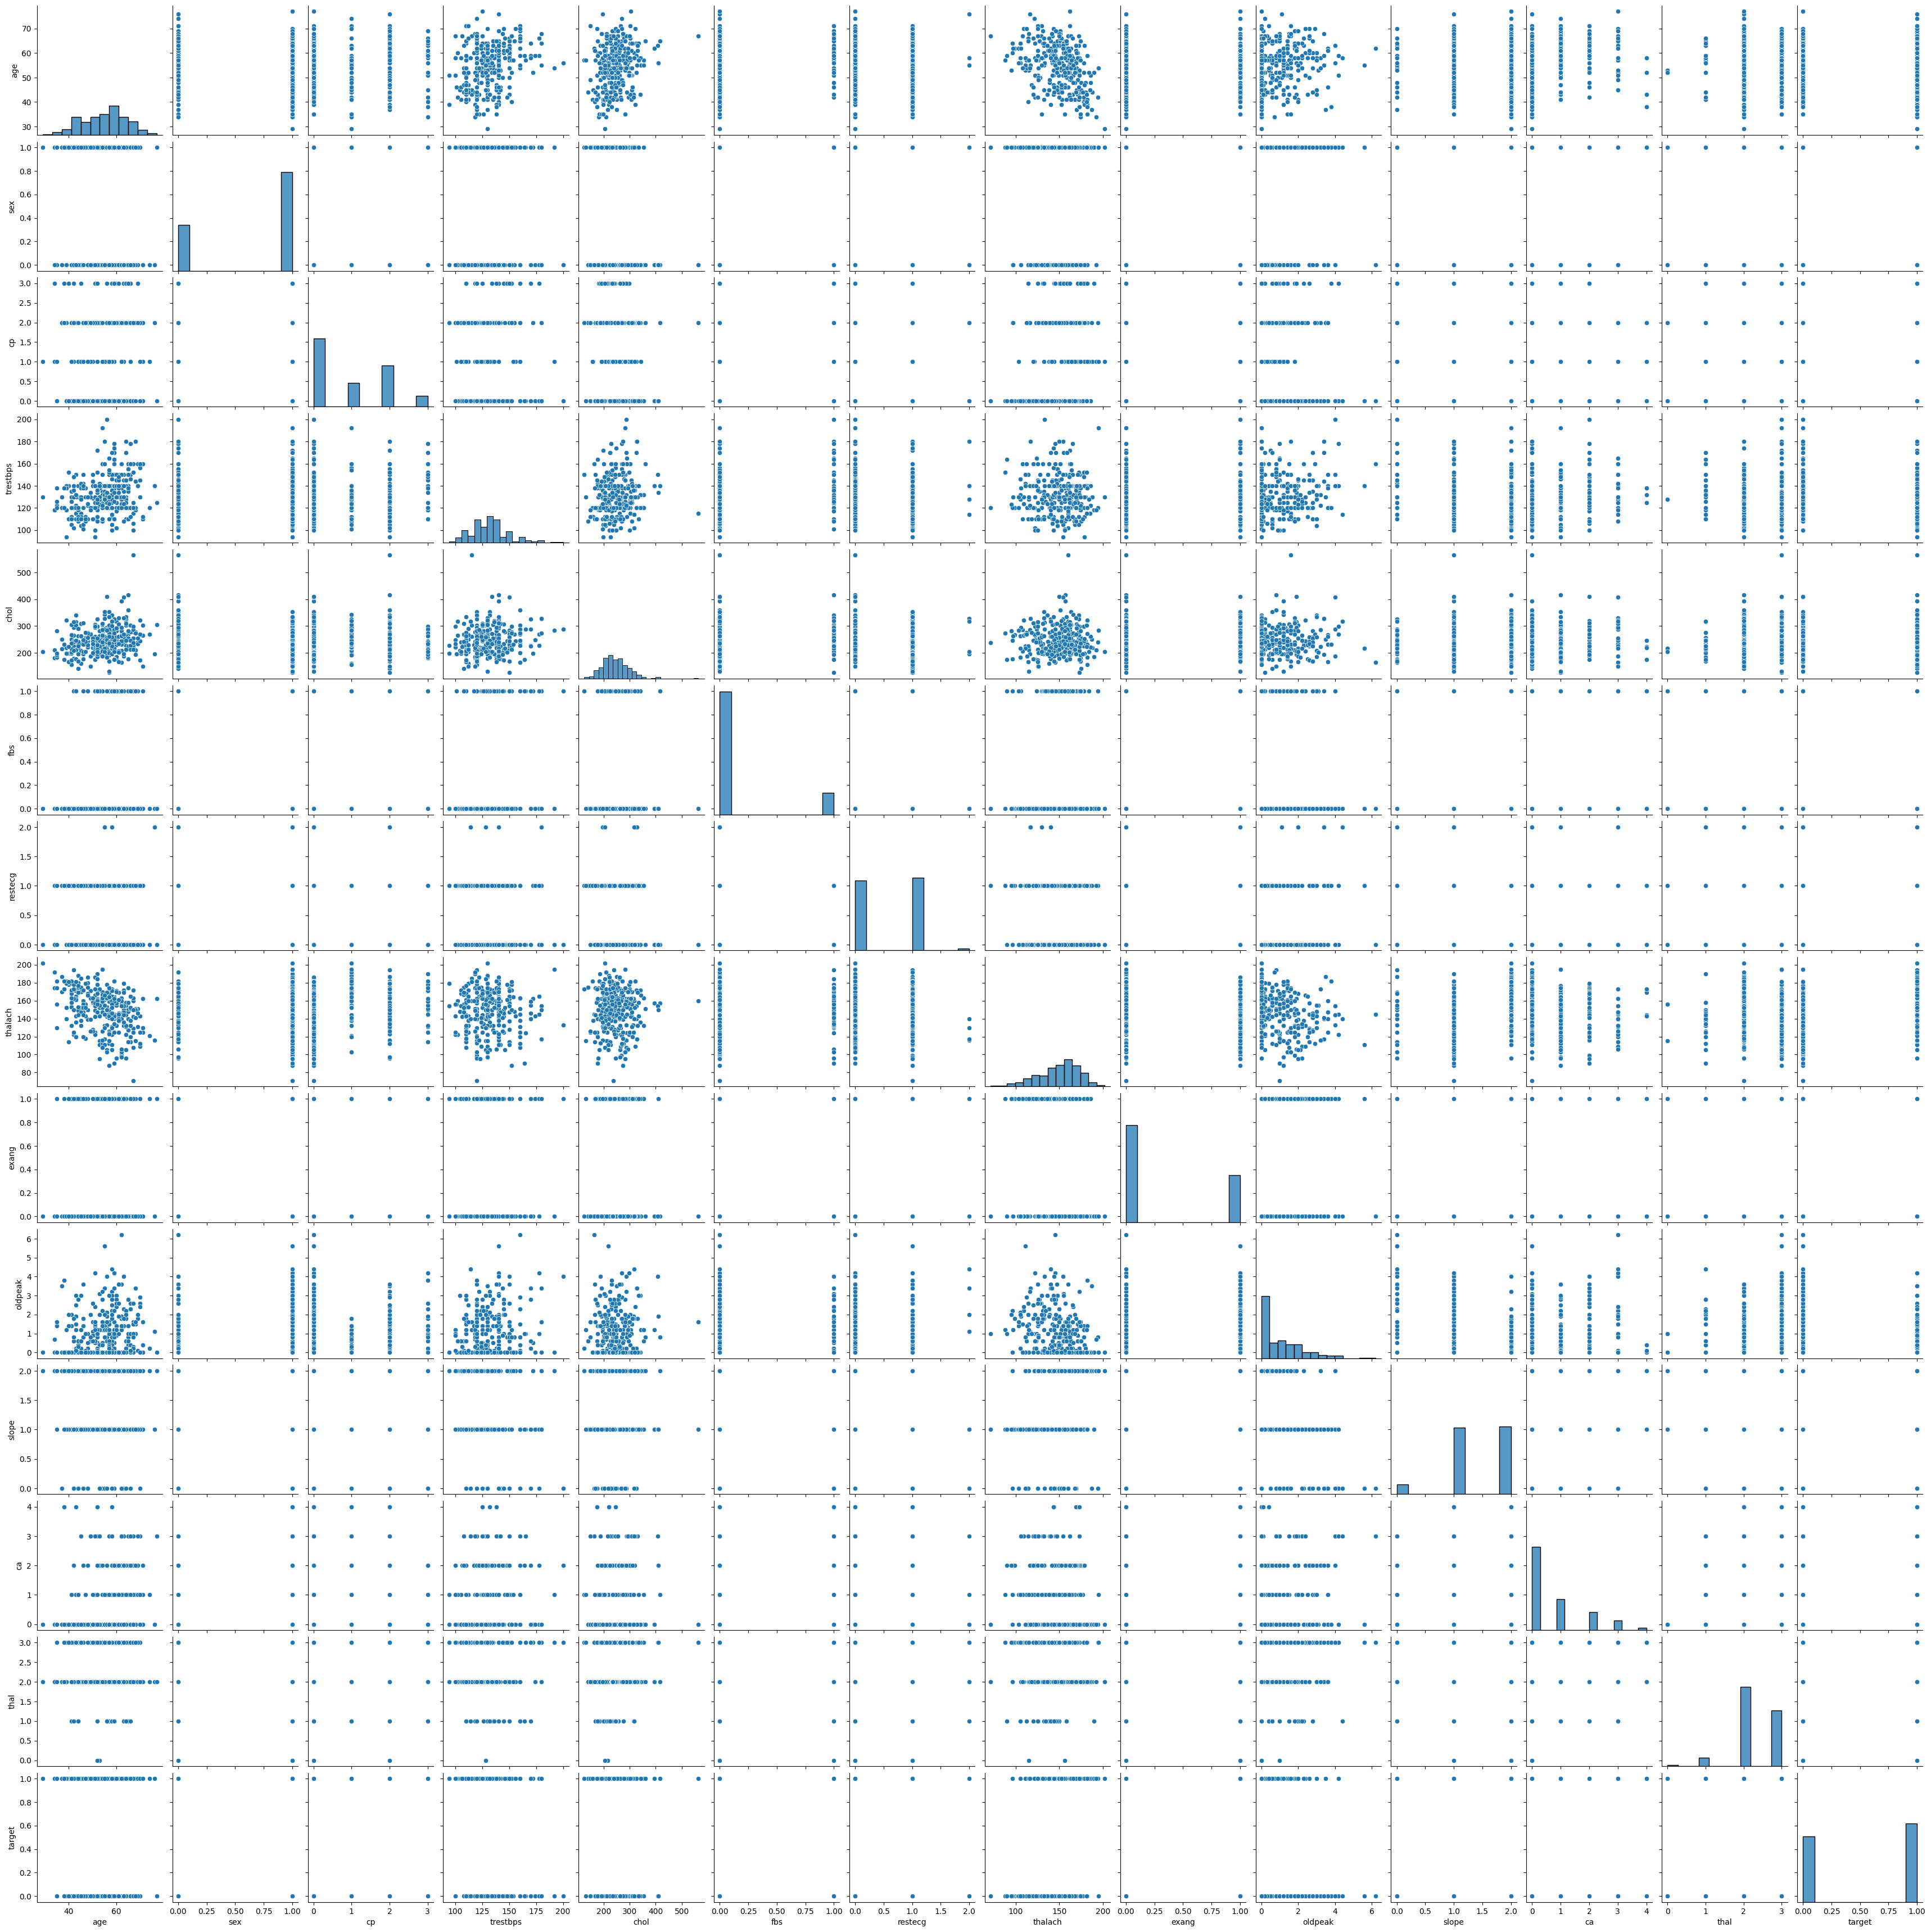

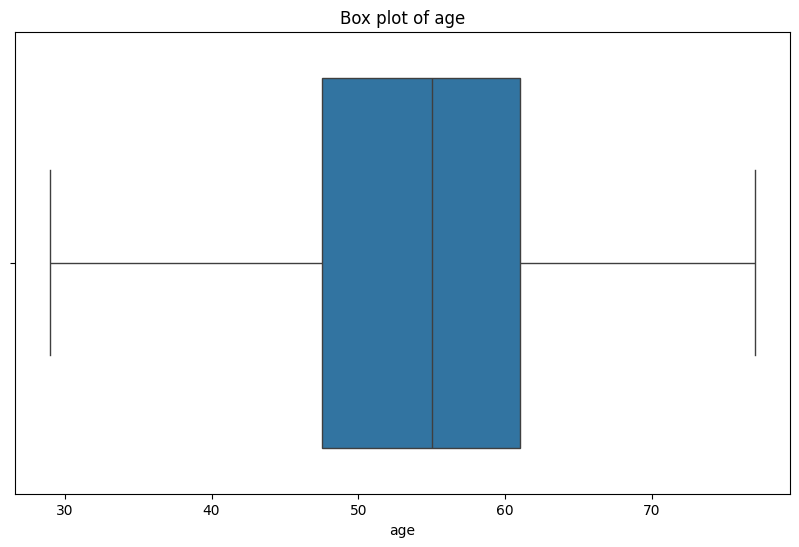

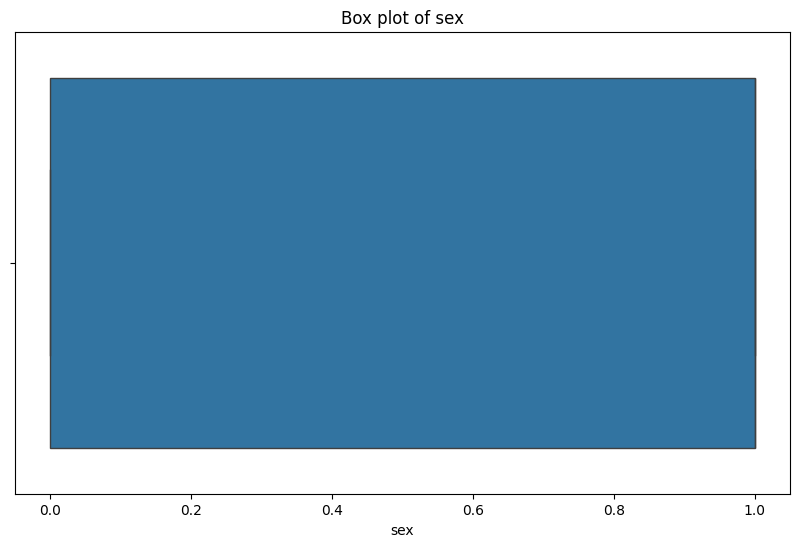

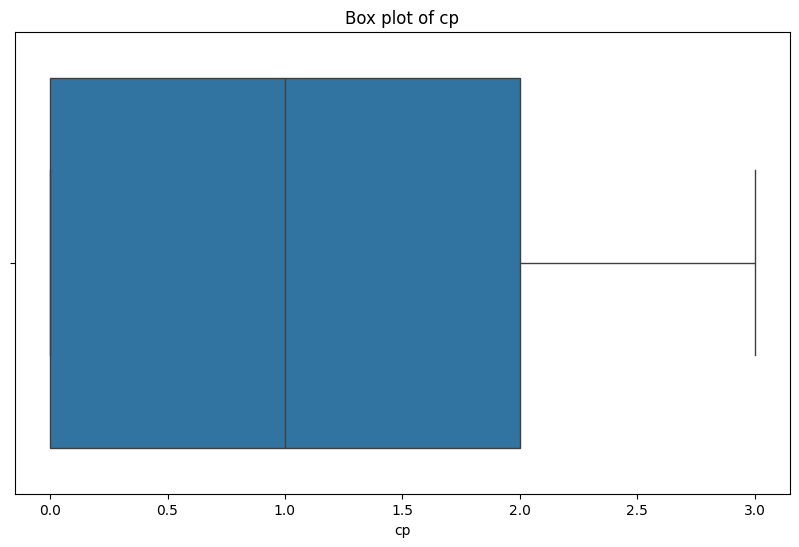

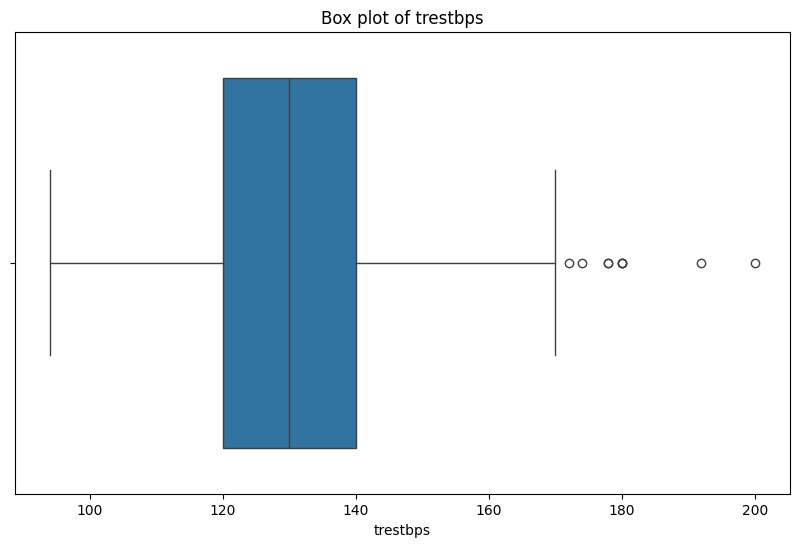

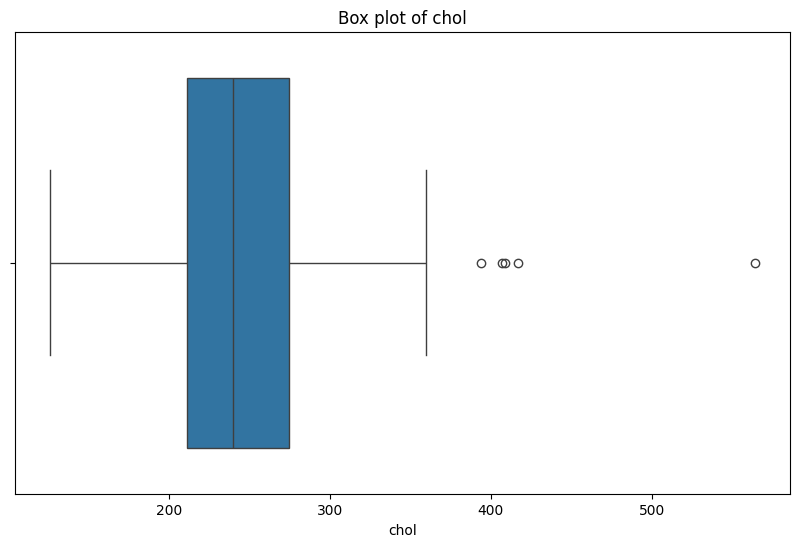

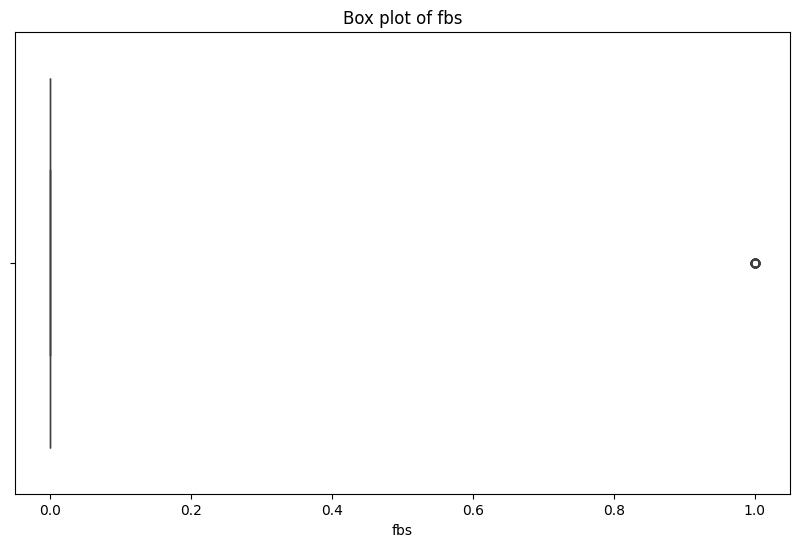

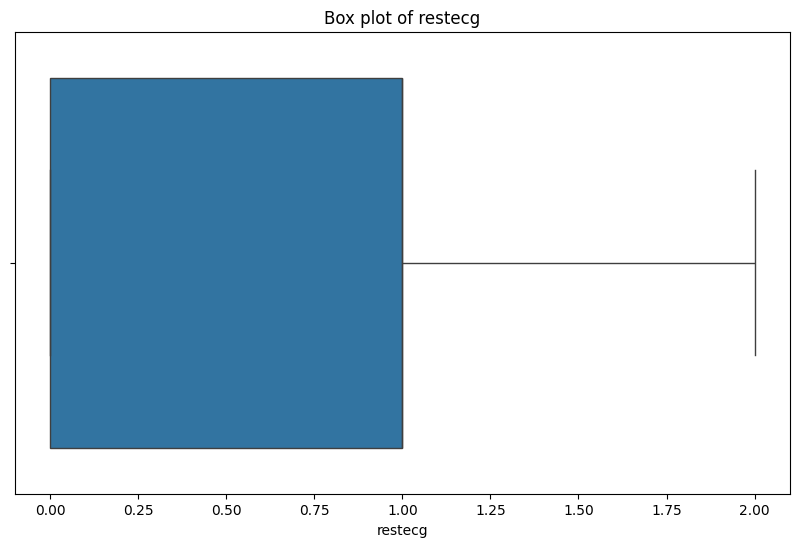

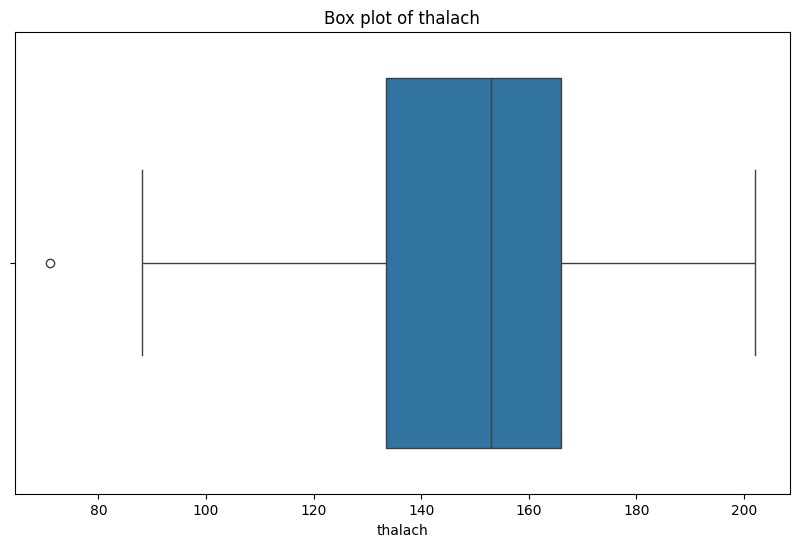

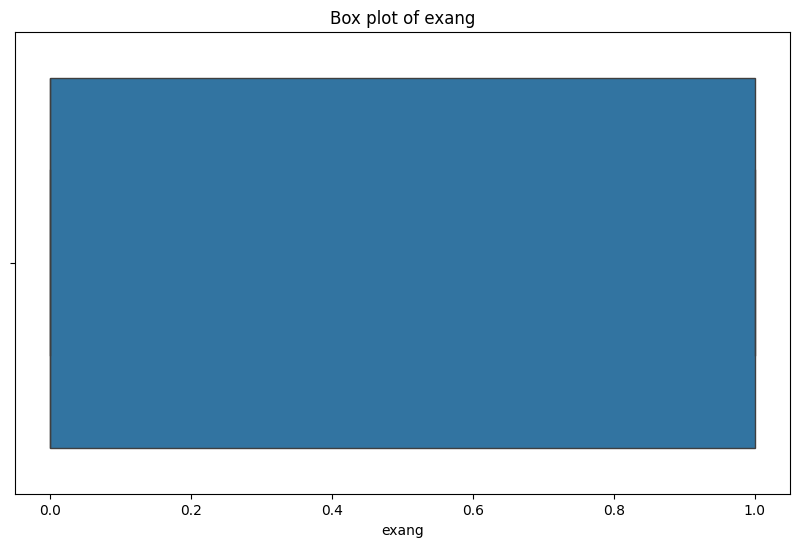

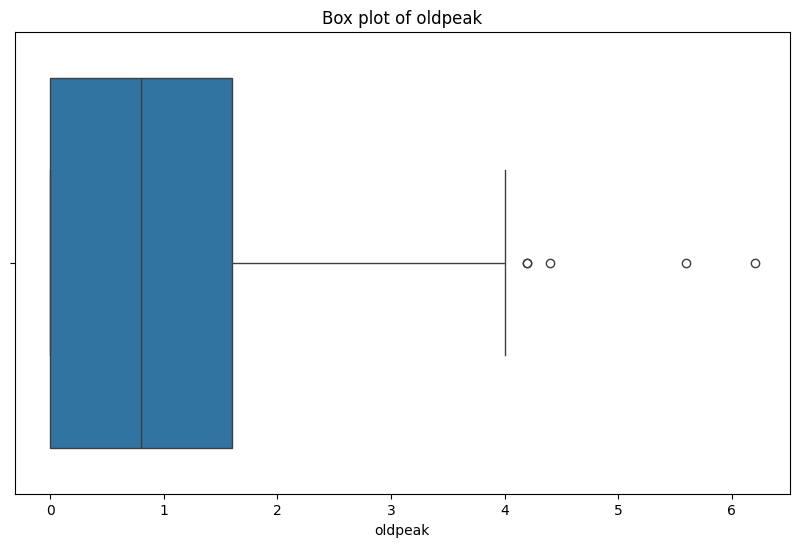

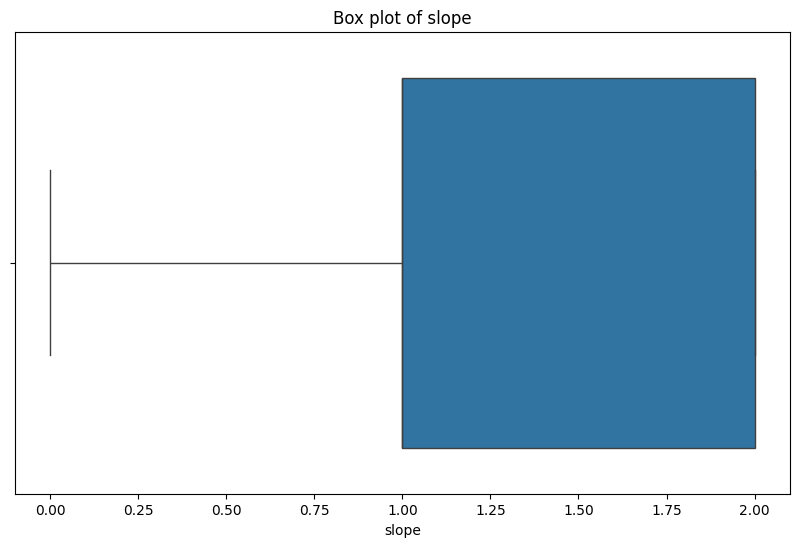

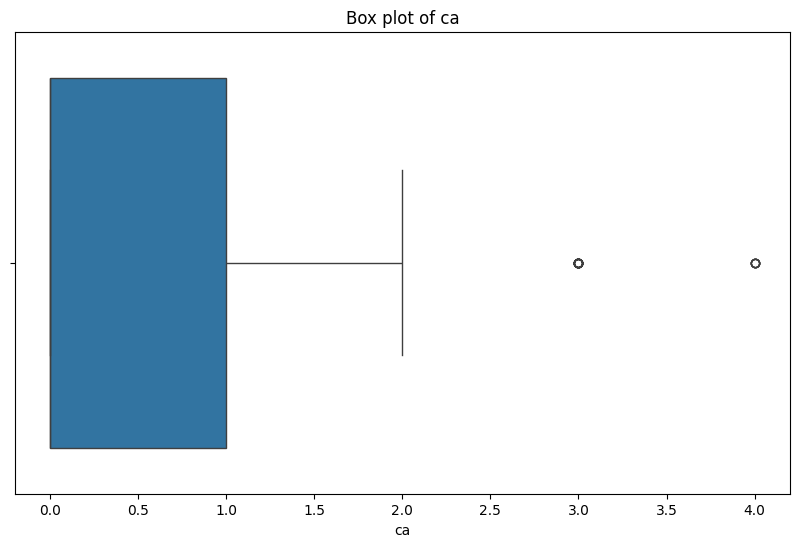

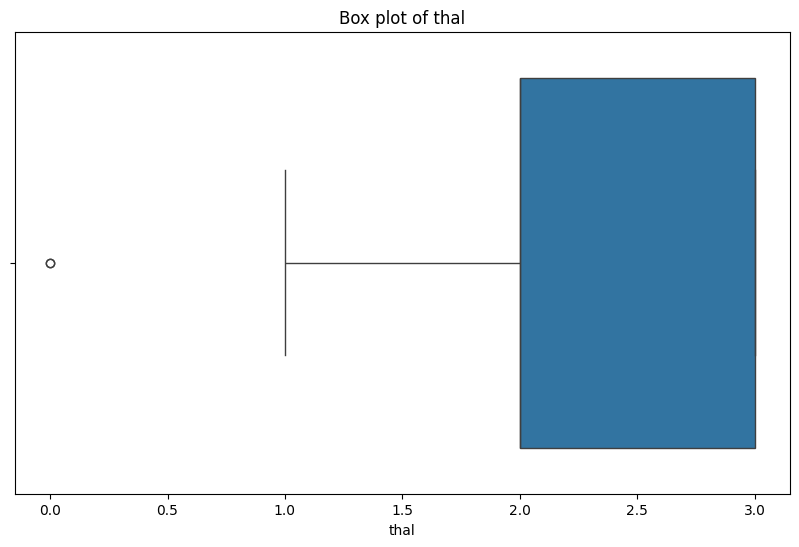

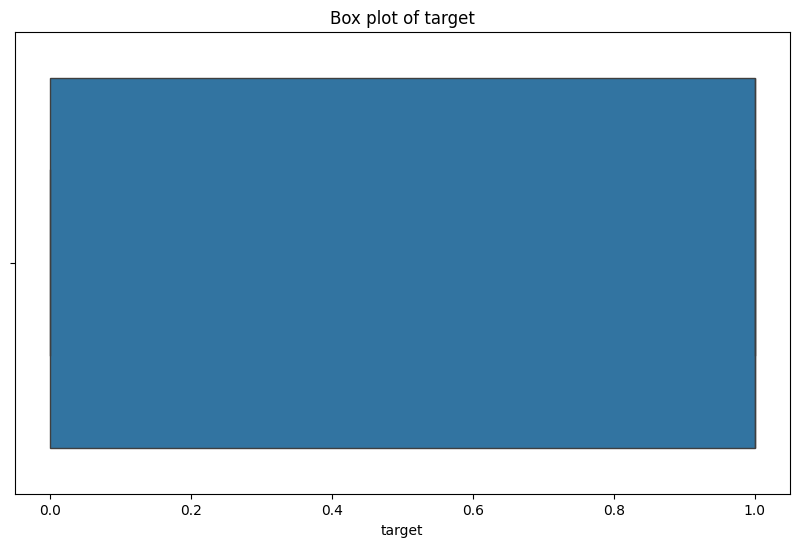


Feature with the most outliers: ca (5 outliers)

Correlation of ca with the target variable: -0.3917239923512519

Feature ca has been retained.

Final DataFrame information after removing features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import zscore

# Load the dataset
df = pd.read_csv('/content/heart-disease.csv')
print("First 5 rows of the dataset:")
print(df.head())

# Basic information about the dataset
print("\nBasic Information:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize the distribution of numerical features
df.hist(bins=20, figsize=(20, 15))
plt.show()

# Check correlations between numerical features
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Visualize pair plots for numerical features
sns.pairplot(df)
plt.show()

# Countplot for categorical features (if any)
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f"Count plot of {column}")
    plt.show()

# Boxplots to check for outliers in numerical features
numerical_columns = df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Box plot of {column}")
    plt.show()

# Z^2 test to identify features with the most outliers
outlier_counts = {}

for column in numerical_columns:
    # Calculate the Z-scores
    z_scores = np.abs(zscore(df[column]))
    # Calculate Z^2 (square of Z-scores)
    z_squared = z_scores ** 2
    # Identify outliers as those with Z^2 greater than a threshold (e.g., 9)
    outliers = np.sum(z_squared > 9)
    outlier_counts[column] = outliers

# Identify the feature with the most outliers
feature_with_most_outliers = max(outlier_counts, key=outlier_counts.get)
print(f"\nFeature with the most outliers: {feature_with_most_outliers} ({outlier_counts[feature_with_most_outliers]} outliers)")

# Assess the contribution of the feature with the most outliers
# You may use correlation with the target variable, feature importance from a model, etc.
# Here, let's assume you're checking correlation with the target variable, replace 'target_column' with your actual target column
correlation_with_target = df[feature_with_most_outliers].corr(df['target'])
print(f"\nCorrelation of {feature_with_most_outliers} with the target variable: {correlation_with_target}")

# If the feature does not contribute significantly, remove it
# Define a threshold for correlation significance (e.g., absolute value < 0.1)
if abs(correlation_with_target) < 0.1:
    df = df.drop(columns=[feature_with_most_outliers])
    print(f"\nFeature {feature_with_most_outliers} has been removed due to low contribution.")
else:
    print(f"\nFeature {feature_with_most_outliers} has been retained.")

# Final dataset information
print("\nFinal DataFrame information after removing features:")
print(df.info())
